## Part 1.2 - Data Analytics

In [27]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from matplotlib import pyplot
import sqlite3
import csv
import scipy.stats as stats
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.stats.weightstats import ztest
import sklearn as sk
from sklearn.feature_selection import f_regression
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import sys
import matplotlib
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

**Pre-processing**

Import the CarSharing table into a CSV file and preprocessing.

In [33]:
conn = sqlite3.connect('CarSharing.db', isolation_level = None)
cur = conn.cursor()

In [34]:
df = pd.read_csv('CarSharing.csv')
df.head()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand
0,1,2017-01-01 00:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,81.0,0.0,2.772589
1,2,2017-01-01 01:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.688879
2,3,2017-01-01 02:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.465736
3,4,2017-01-01 03:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,2.564949
4,5,2017-01-01 04:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,0.000000


In [4]:
#Checking for missing values in each column

df.isnull().sum()

id               0
timestamp        0
season           0
holiday          0
workingday       0
weather          0
temp          1202
temp_feel      102
humidity        39
windspeed      200
demand           0
dtype: int64

I now know which columns contain null values, and I will replace these values with the median value of each one.

In [5]:
#Replacing empty cells in 'windspeed' and with median values.

windMean = df["windspeed"].mean()
df.windspeed = df.windspeed.fillna(windMean)

In [6]:
#replacing empty cells in 'humidity' with median values.

humidityMean = df["humidity"].mean()
df.humidity = df.humidity.fillna(humidityMean)

In [7]:
#Replacing empty cells in 'temp' with median values.

tempMean = df["temp"].mean()
df.temp = df.temp.fillna(tempMean)

In [8]:
#Replacing empty cells in 'temp_feel' with median values.

temp_feelMean = df["temp_feel"].mean()
df.temp_feel = df.temp_feel.fillna(temp_feelMean)

In [9]:
#Drop rows with duplicate values

df.drop_duplicates(inplace = True)

In [16]:
#Checking that the missing values have been replaced

df.isnull().sum()

id            0
timestamp     0
season        0
holiday       0
workingday    0
weather       0
temp          0
temp_feel     0
humidity      0
windspeed     0
demand        0
dtype: int64

In [17]:
df.describe()

,id,temp,temp_feel,humidity,windspeed,demand
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,4354.500000,20.089454,23.531261,60.993540,13.048589,4.452725
std,2513.927405,7.448937,8.686664,19.635766,8.215051,1.493963
min,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000
25%,2177.750000,14.760000,16.665000,46.000000,7.001500,3.637586
50%,4354.500000,20.089454,24.240000,60.993540,12.998000,4.867534
75%,6531.250000,25.420000,31.060000,77.000000,19.001200,5.556828
max,8708.000000,41.000000,45.455000,100.000000,56.996900,6.792344


As we still have the same number of records, this indicates that there were no duplicate rows to begin with. All null values in the dataframe have been replaced with the median value of their respective columns.

In [35]:
#Using a variety of sqlite CASE statements, I will replace all strings with integers.

cur.execute("""
UPDATE CarSharingClean
SET season = CASE
    WHEN season IS 'spring' THEN 0
    WHEN season IS 'summer' THEN 1
    WHEN season IS 'fall' THEN 2
    WHEN season IS 'winter' THEN 3
    ELSE 4
""")

cur.execute("""
UPDATE CarSharingClean
SET workingday = CASE
    WHEN holiday IS 'No' THEN 0
    WHEN workingday IS 'Yes' THEN 1
END;
""")

clean_df = cur.execute("SELECT * FROM CleanDataframe")
with open("clean_dataframe.csv", "w") as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow([i[0] for i in clean_df.description])
    csv_writer.writerows(clean_df)

In [3]:
#Removing duplicate columns from the clean dataframe
from sklearn import BinararyEncoder

df1 = pd.read_csv("clean_dataframe.csv")
df1.drop_duplicates(subset = ['year', 'month', 'day'], inplace = True)
df1.head()

,id,year,month,day,season,holiday,workingday,weather_code,temp,temp_feel,humidity,windspeed,demand
0,1,2017,1,1,0,0,0,1,9.84,14.395,81.0,0.0000,2.772589
24,25,2017,1,2,0,0,0,2,18.86,22.725,88.0,19.9995,2.833213
47,48,2017,1,3,0,0,0,1,9.02,9.850,44.0,23.9994,1.609438
69,70,2017,1,4,0,0,0,1,6.56,9.090,55.0,7.0015,1.609438
92,93,2017,1,5,0,0,0,1,8.20,12.880,64.0,0.0000,1.791759


In [44]:
df1.describe()

,id,year,month,day,season,holiday,workingday,weather_code,temp,temp_feel,humidity,windspeed,demand
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,4334.038251,2017.377049,5.612022,9.904372,1.221311,0.027322,0.027322,1.382514,19.117579,22.338757,67.193989,11.072333,3.597511
std,2530.030069,0.485311,3.227836,5.510054,1.053466,0.163244,0.163244,0.597823,6.972053,8.115962,17.368309,7.273314,0.846146
min,1.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.280000,3.030000,0.000000,0.000000,0.693147
25%,2145.000000,2017.000000,3.000000,5.000000,0.000000,0.000000,0.000000,1.000000,13.940000,15.150000,54.000000,7.001500,3.102155
50%,4332.000000,2017.000000,5.000000,10.000000,1.000000,0.000000,0.000000,1.000000,20.089454,22.725000,68.000000,11.001400,3.637586
75%,6517.000000,2018.000000,8.000000,15.000000,2.000000,0.000000,0.000000,2.000000,24.600000,29.545000,81.000000,15.001300,4.215804
max,8704.000000,2018.000000,12.000000,19.000000,3.000000,1.000000,1.000000,3.000000,33.620000,39.395000,100.000000,32.997500,5.327876


**Hypothesis Testing**

Using appropriate hypothesis testing, I will determine if there is a significant relationship
between each column (except the timestamp column) and the demand rate.

In [3]:
#Using Student's T-test with humidity (predictor) and demand (outcome) variables.

stats.ttest_ind(df1['demand'], df1['humidity'], equal_var = True)

Ttest_indResult(statistic=-69.96829623124044, pvalue=0.0)

Because the difference in mean values between the columns is so great, this results in a very low p-value, giving suitable reason to reject the NULL hypothesis.

In [5]:
#Using Z-test with humidity, windspeed (predictor) and demand (outcome) variables.

data1 = df1['demand']
data2 = df1['humidity']
data3 = df1['windspeed']

print("Z-tests:")
ztest_Score, p_value = ztest(data1, data2)
print(ztest_Score, p_value)

ztest_score2, p_value2 = ztest(data1, data3)
print(ztest_score2, p_value2)

#Using Student's T-test with humidity, windspeed (predictor) and demand (outcome) variables.

humidity_ttest = stats.ttest_ind(a=data1, b=data2, equal_var=True)
windspeed_ttest = stats.ttest_ind(a=data1, b=data3, equal_var=True)

print("Student's T-tests:")
print(humidity_ttest)
print(windspeed_ttest)

Z-tests:
-69.96829623124044 0.0
-19.52944420834522 6.170733826667025e-85
Student's T-tests:
Ttest_indResult(statistic=-69.96829623124044, pvalue=0.0)
Ttest_indResult(statistic=-19.52944420834522, pvalue=1.178997430129824e-68)


T-test and Z-test of the same variables produce identical results due to the large size of the dataset. This is likely not the most appropriate hypothesis test to use.

In [6]:
#Simple linear regression of 'humidity' and 'demand' variables

y1 = df1['windspeed']
y2 = df1['humidity']
y3 = df1['temp']
y4 = df1['temp_feel']
x= df1[['demand']]

a = f_regression(x, y1)
print('Windspeed vs. Demand')
print(a)

b = f_regression(x, y2)
print('Humidity vs. Demand')
print(b)

c = f_regression(x, y3)
print('Temp vs. Demand')
print(c)

d = f_regression(x, y4)
print('Temp_feel vs. Demand')
print(d)

Windspeed vs. Demand
(array([2.276836]), array([0.13218701]))
Humidity vs. Demand
(array([1.66920699]), array([0.19718445]))
Temp vs. Demand
(array([125.84609807]), array([2.76967487e-25]))
Temp_feel vs. Demand
(array([156.18980516]), array([4.55638403e-30]))


Regression tests show that temperature and temp_feel have a significant relationship with demand, whereas windspeed and humidity do not, as shown by their much higher p-values.

**Time Series**

Using time series plots to see any seasonal or cyclic pattern in the temp, humidity,
windspeed, or demand data in 2017. 

In [22]:
#Making a new table with one record per day in 2017 with the total demand for that day.
#This will remove some irrelevant data for the time series.

df.to_sql('CarSharingClean', conn, if_exists = 'append', index = False)

8708

In [ ]:
#This table takes one entry per date for demand, temperature, windspeed and humidity

cur.execute("""
CREATE TABLE time_series_data AS
SELECT strftime('%Y-%m-%d', timestamp) date, demand, temp, windspeed, humidity
FROM CarSharingClean
WHERE timestamp BETWEEN date('2017-01-01') AND date('2017-12-31')
GROUP BY date;
""")

In [ ]:
#Transferring the above SQLite table to a time series dataframe.

df_timeseries = cur.execute("SELECT * FROM time_series_data")
with open("time_series_data.csv", "w") as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow([i[0] for i in cur.description])
    csv_writer.writerows(df_timeseries)

In [10]:
df_time_series = pd.read_csv('time_series_data.csv')
df_time_series.head()

,date,demand,temp,windspeed,humidity
0,2017-01-01,2.772589,9.84,0.0000,81.0
1,2017-01-02,2.833213,18.86,19.9995,88.0
2,2017-01-03,1.609438,9.02,23.9994,44.0
3,2017-01-04,1.609438,6.56,7.0015,55.0
4,2017-01-05,1.791759,8.20,0.0000,64.0


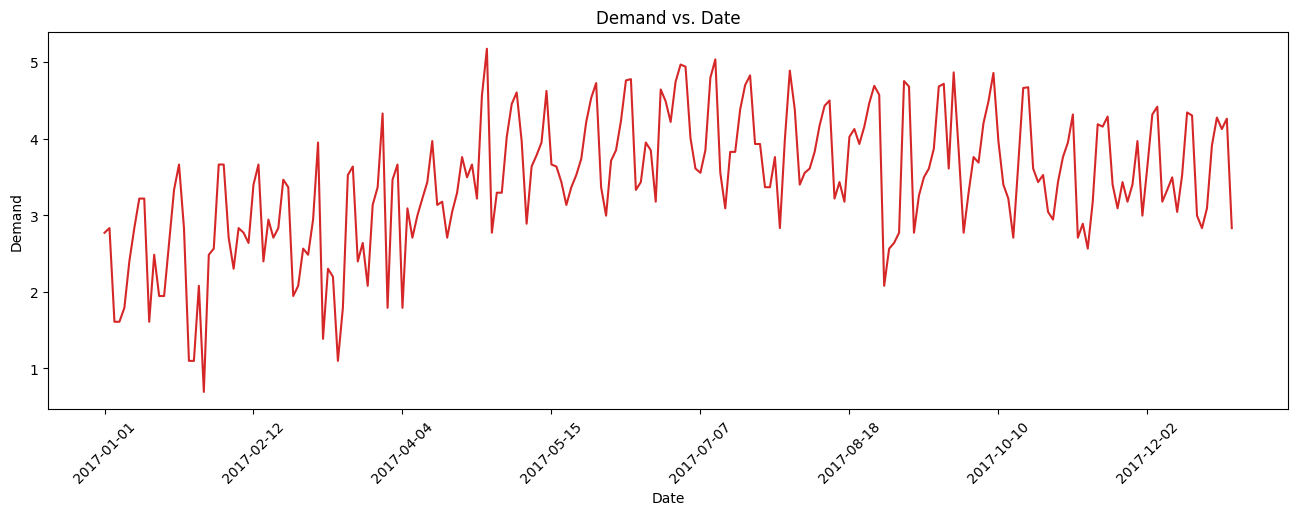

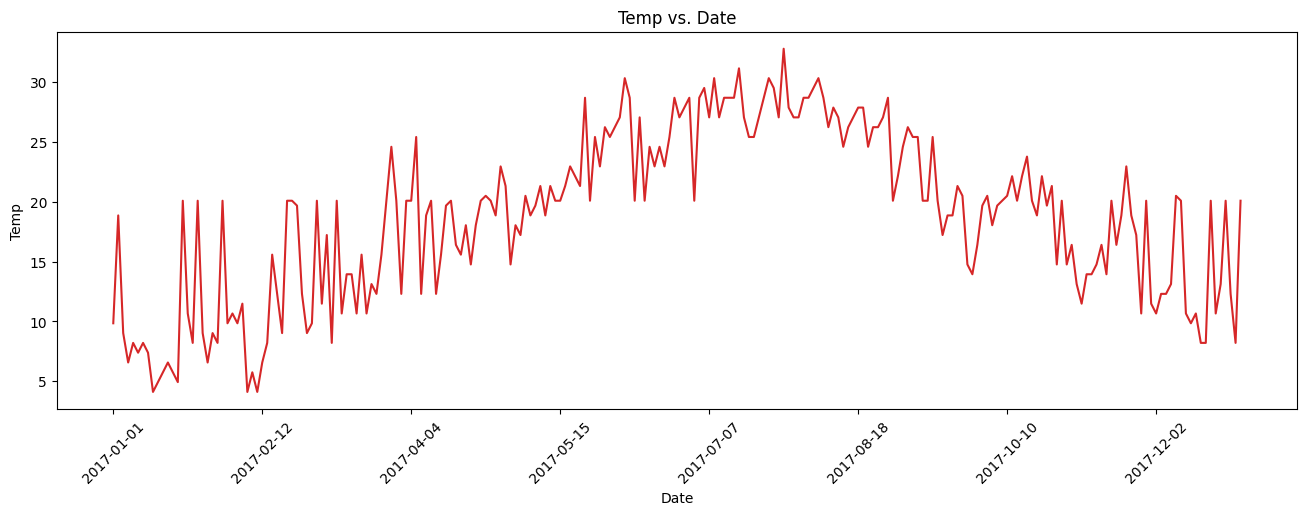

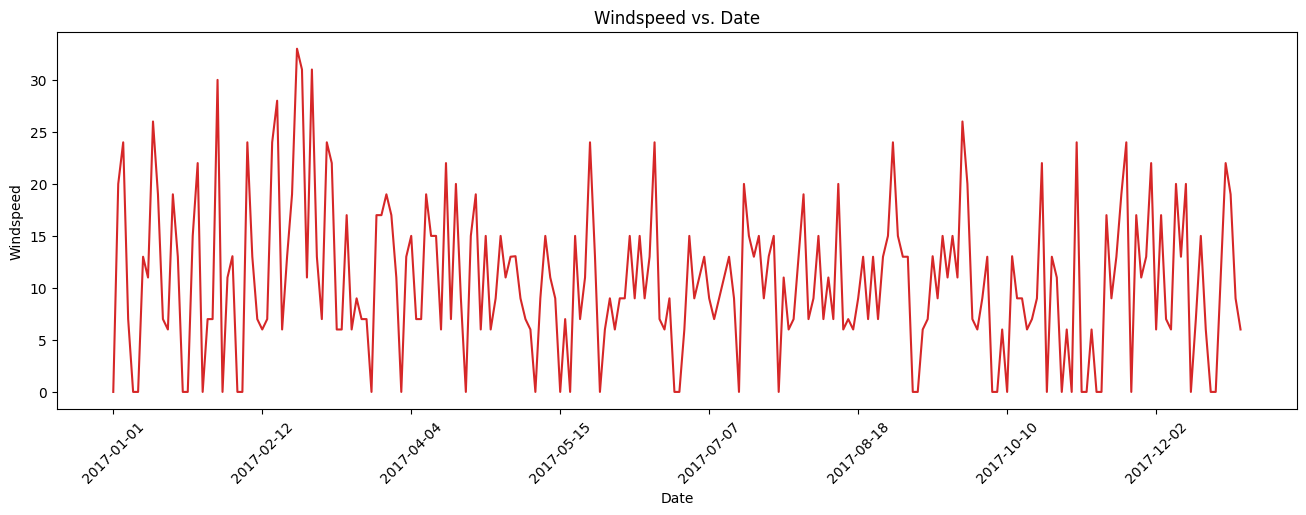

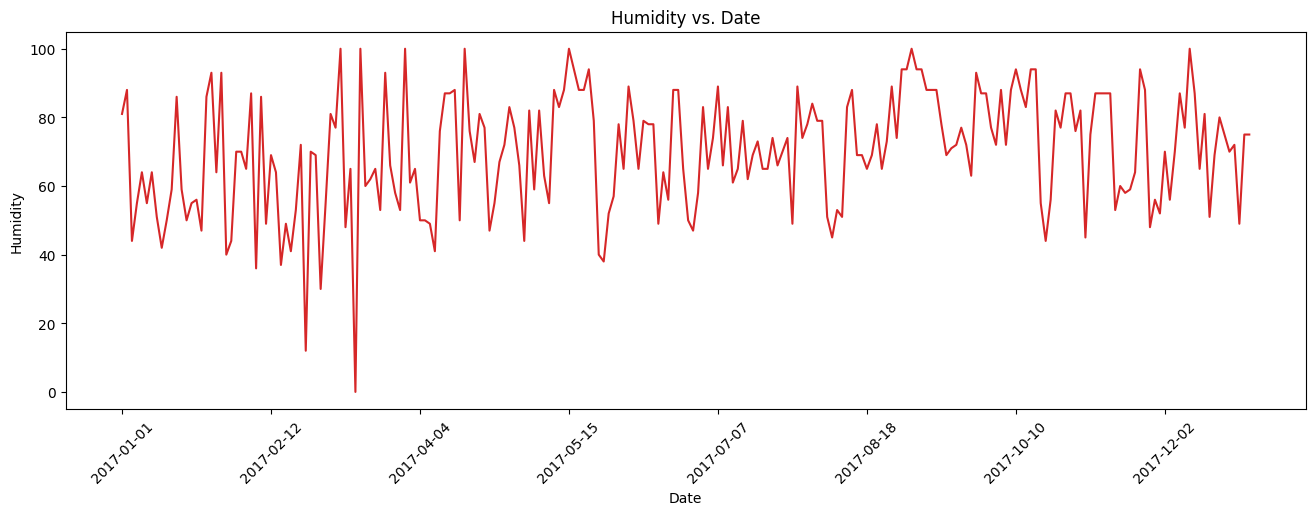

In [25]:
#Time series plot of demand vs. date

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Demand', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(np.arange(0, len(df_time_series), 30), df_time_series.date[::30], rotation=45)
    plt.show()
demand_series = plot_df(df_time_series, x=df_time_series.date, y=df_time_series.demand, title='Demand vs. Date')
demand_series

#Time series plot of temp vs. date

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Temp', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(np.arange(0, len(df_time_series), 30), df_time_series.date[::30], rotation=45)
    plt.show()

plot_df(df_time_series, x=df_time_series.date, y=df_time_series.temp, title='Temp vs. Date')

#Time series plot of windspeed vs. date

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Windspeed', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(np.arange(0, len(df_time_series), 30), df_time_series.date[::30], rotation=45)
    plt.show()

plot_df(df_time_series, x=df_time_series.date, y=df_time_series.windspeed, title='Windspeed vs. Date')

#Time series plot of humidity vs. date

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Humidity', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(np.arange(0, len(df_time_series), 30), df_time_series.date[::30], rotation=45)
    plt.show()

plot_df(df_time_series, x=df_time_series.date, y=df_time_series.humidity, title='Humidity vs. Date')

Demand Time Series:

Cyclic data was observed in the form of a spike in demand every weekend, because as previously established, Saturday was the weekday with the highest demand on average. The demand can then be observed to drop again once the weekend has ended. This pattern is mostly consistent throughout 2017's data.

**ARIMA**

Using an ARIMA model to predict the weekly average demand rate. Considering 30 percent of
data for testing. 

In [11]:
#Creating a new dataframe for the ARIMA model from the clean dataset

cur.execute("""
CREATE TABLE arima_series AS
SELECT date, demand
FROM time_series_data;
""")

df_arima = cur.execute("SELECT * FROM arima_series")
with open("arima_series.csv", "w") as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow([i[0] for i in cur.description])
    csv_writer.writerows(df_arima)

In [12]:
from pandas import datetime

def parser(x):
    return datetime.strptime(x,'%Y-%m-%W')
    
arima_series = pd.read_csv('arima_series.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

C:\Users\Aaron\AppData\Local\Temp\ipykernel_16540\1329081919.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\Users\Aaron\AppData\Local\Temp\ipykernel_16540\1329081919.py:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  arima_series = pd.read_csv('arima_series.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


In [13]:
arima_series.head()

date
2017-01-01    2.772589
2017-01-01    2.833213
2017-01-01    3.218876
2017-01-01    3.663562
2017-02-01    2.079442
Name: demand, dtype: float64

In [48]:
model = ARIMA(arima_series, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 demand   No. Observations:                   43
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -45.653
Date:                Sun, 25 Dec 2022   AIC                             97.306
Time:                        19:34:36   BIC                            102.519
Sample:                             0   HQIC                            99.217
                                 - 43                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1603      0.230     -0.696      0.486      -0.612       0.291
ma.L1         -0.7053      0.160     -4.410      0.000      -1.019      -0.392
sigma2         0.5036      0.134      3.764      0.0

c:\Users\Aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [30]:
#Checking the p-value of the time series plot for demand vs. date

result = adfuller(arima_series.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.785899
p-value: 0.387485


As the p-value is greater than 0.05, it presently accepts the NULL hypothesis. Therefore, differencing the time series is necessary to make it stationary.

In [31]:
#Differencing the ARIMA series data to make it stationary

result = adfuller(arima_series.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -12.855489
p-value: 0.000000


c:\Users\Aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


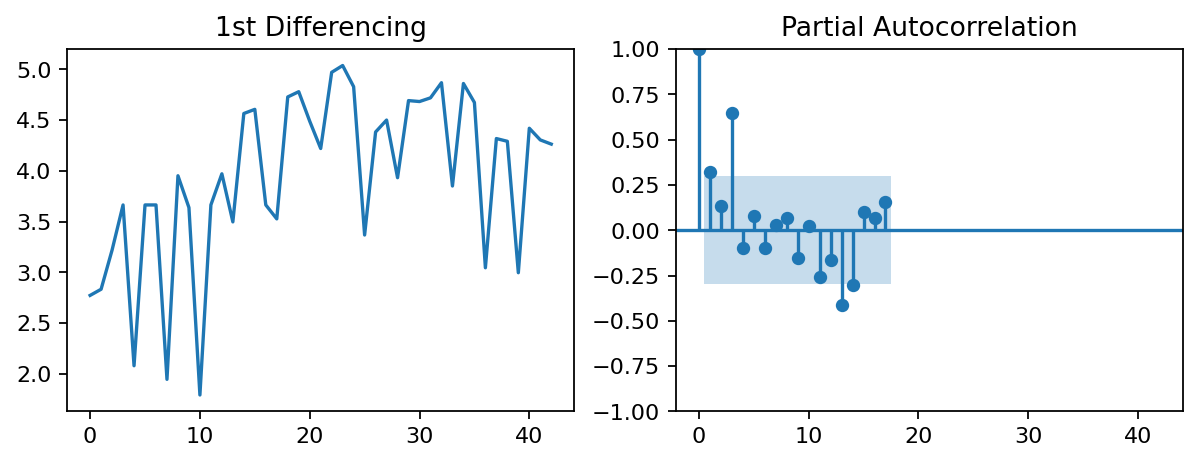

In [39]:
#Creating a PACF plot to visualize significant lags to set p in ARIMA model

pacf = pd.DataFrame(arima_series.values, columns=['demand'])
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':160})
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(pacf.demand); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(pacf.demand, ax=axes[1])
plt.show()

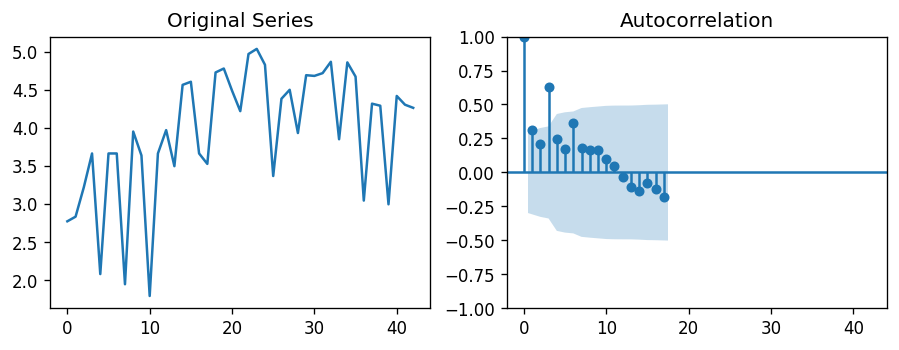

In [33]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
df = pd.DataFrame(arima_series.values, columns=['demand'])
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.demand); axes[0].set_title('Original Series')
axes[1].set(ylim=(0,1.2))
plot_acf(df.demand, ax=axes[1])
plt.show()

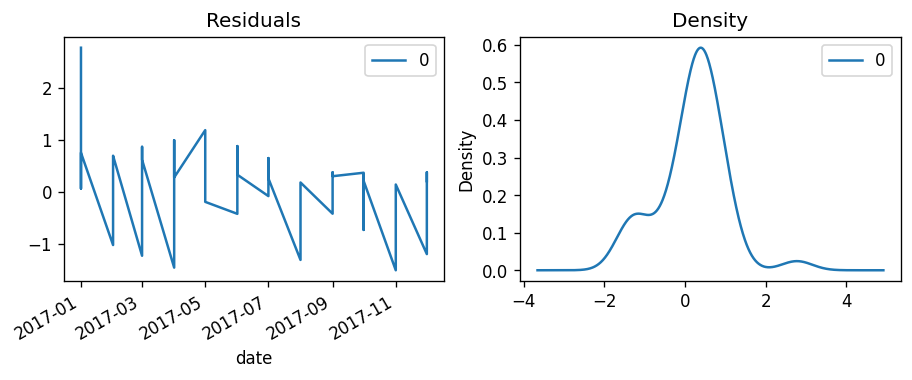

In [34]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

predicted = 4.315479, expected = 4.682131
predicted = 4.434173, expected = 4.718499
predicted = 4.518748, expected = 4.867534
predicted = 4.610539, expected = 3.850148
predicted = 4.509968, expected = 4.859812
predicted = 4.472200, expected = 4.672829
predicted = 4.563087, expected = 3.044522
predicted = 4.353131, expected = 4.317488
predicted = 4.150924, expected = 4.290459
predicted = 4.199165, expected = 2.995732
predicted = 4.028720, expected = 4.418841
predicted = 3.908525, expected = 4.304065
predicted = 4.058063, expected = 4.262680
Test RMSE: 0.633


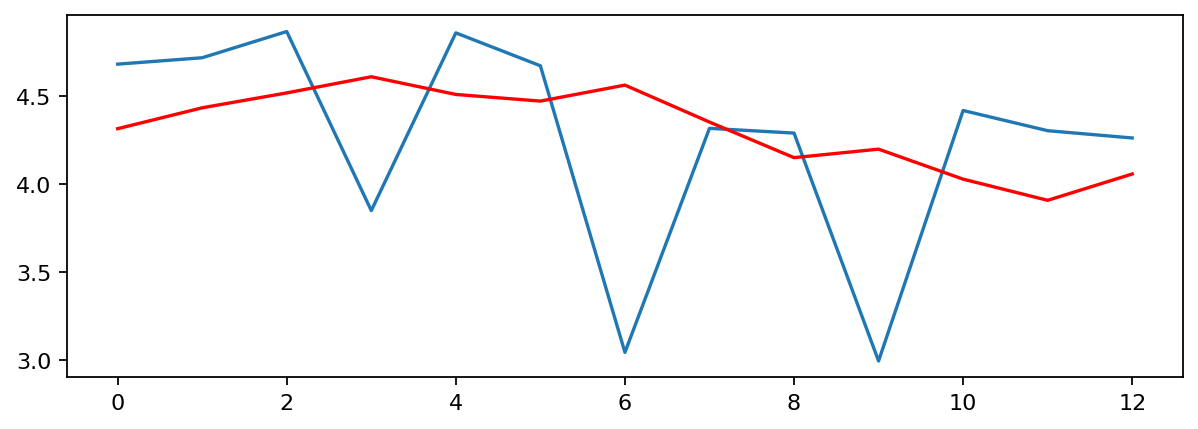

In [47]:
X = arima_series.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order = (1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted = %f, expected = %f' % (yhat, obs))

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

pyplot.plot(test)
pyplot.plot(predictions, color = 'red')
pyplot.show()

**Predictions by Machine Learning Algorithms**

Using a random forest regressor and a deep neural network to predict the demand rate.

In [84]:
#Neural Network Model

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [102]:
df1.drop('demand_category', axis = 1, inplace = True)
X = df1.drop('demand', axis = 1).values
y = df1['demand'].values

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [104]:
model = keras.Sequential()
model.add(keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1))

In [105]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
8/8 [==============================] - 0s 999us/step - loss: 745.7630
Epoch 2/10
8/8 [==============================] - 0s 997us/step - loss: 225.0082
Epoch 3/10
8/8 [==============================] - 0s 712us/step - loss: 90.2303
Epoch 4/10
8/8 [==============================] - 0s 855us/step - loss: 43.2755
Epoch 5/10
8/8 [==============================] - 0s 855us/step - loss: 18.0377
Epoch 6/10
8/8 [==============================] - 0s 855us/step - loss: 14.2254
Epoch 7/10
8/8 [==============================] - 0s 855us/step - loss: 9.0523
Epoch 8/10
8/8 [==============================] - 0s 997us/step - loss: 7.4532
Epoch 9/10
8/8 [==============================] - 0s 1ms/step - loss: 7.7169
Epoch 10/10
8/8 [==============================] - 0s 855us/step - loss: 7.1590


In [106]:
loss = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss: ', loss)

Test loss:  8.908368110656738


In [107]:
predictions = model.predict(X_test)

4/4 [==============================] - 0s 998us/step


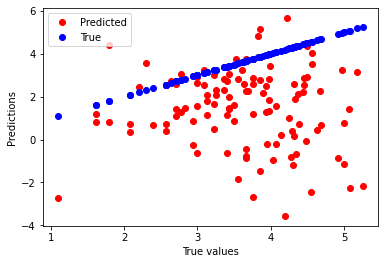

In [110]:
plt.plot(y_test, predictions, 'o', color='red')
plt.plot(y_test, y_test, 'o', color='blue')
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.legend(['Predicted', 'True'], loc='upper left')
plt.show()

In [109]:
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse:.2f}')

MSE: 8.91


In [2]:
#Random Forest Model

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

In [40]:
input = df1
target = df1['demand']
df1.head()

,id,year,month,day,season,holiday,workingday,weather_code,temp,temp_feel,humidity,windspeed,demand
0,1,2017,1,1,0,0,0,1,9.84,14.395,81.0,0.0000,2.772589
24,25,2017,1,2,0,0,0,2,18.86,22.725,88.0,19.9995,2.833213
47,48,2017,1,3,0,0,0,1,9.02,9.850,44.0,23.9994,1.609438
69,70,2017,1,4,0,0,0,1,6.56,9.090,55.0,7.0015,1.609438
92,93,2017,1,5,0,0,0,1,8.20,12.880,64.0,0.0000,1.791759


In [41]:
sc = MinMaxScaler()
input = sc.fit_transform(input)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.3)

In [49]:
model1 = RandomForestRegressor(n_estimators=100, max_depth=2)
model1.fit(X_train, y_train)

RandomForestRegressor(max_depth=2)

In [50]:
prediction = model1.predict(X_test)
print(mean_squared_error(y_test, prediction))

0.050422256209908055


In [54]:
df_forest = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
df_forest

,Actual,Predicted
7791,3.526361,3.432572
6880,3.806662,3.862179
1539,3.970292,3.862179
6210,3.091042,3.146708
7839,4.077537,3.870223
...,...,...
6641,3.663562,3.781627
7024,3.401197,3.209025
3935,3.610918,3.781627
1994,2.890372,3.097138


C:\Users\Aaron\AppData\Local\Temp\ipykernel_26228\3965979465.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_forest['Actual'], hist=False, color="r", label="Actual Value")
C:\Users\Aaron\AppData\Local\Temp\ipykernel_26228\3965979465.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

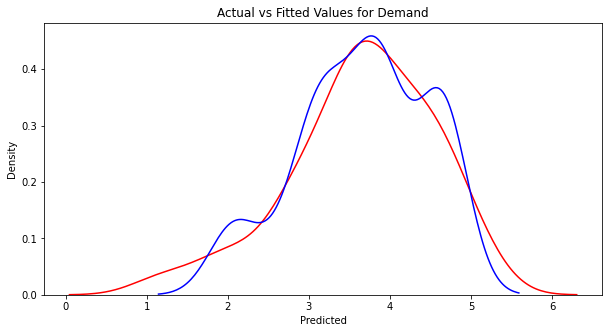

In [52]:
import seaborn as sns
plt.figure(figsize=(10,5))

ax = sns.distplot(df_forest['Actual'], hist=False, color="r", label="Actual Value")
sns.distplot(df_forest['Predicted'], hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values for Demand')
plt.show()
plt.close()

**Classification**

I will take the average demand rate as reported by the dataset, and use it as a basis for classifying the demand rates in the table. 30% of data will be considered for testing.

In [50]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
import seaborn as sns

*Classifier 1 - KNN*

In [7]:
average_demand = df1['demand'].mean()
print(average_demand)

3.5975112305683052


In [8]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df1['demand'].values.reshape(-1,1))
labels = kmeans.predict(df1['demand'].values.reshape(-1,1))

low_demand = df1['demand'][labels == 0]
high_demand = df1['demand'][labels == 1]

In [9]:
df1['demand_category'] = df1['demand'].apply(lambda x: 'low' if x < average_demand else 'high')

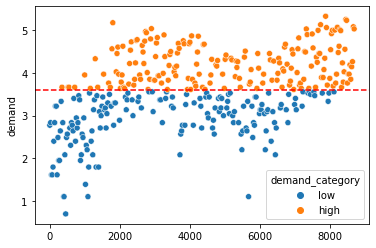

In [10]:
graph = sns.scatterplot(x = df1.index, y = 'demand', hue = 'demand_category', data = df1)
graph.axhline(y=average_demand, color='r', linestyle='dashed')
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df1['demand'], df1['demand_category'], test_size=0.3, random_state=42)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
predictions = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
print('Accuracy: ', accuracy)
predictions

Accuracy:  1.0


array(['high', 'low', 'high', 'low', 'low', 'low', 'high', 'high', 'high',
       'high', 'high', 'low', 'high', 'low', 'high', 'high', 'low',
       'high', 'high', 'low', 'low', 'low', 'high', 'low', 'low', 'high',
       'low', 'high', 'high', 'high', 'low', 'low', 'low', 'high', 'low',
       'high', 'low', 'low', 'high', 'high', 'high', 'high', 'low',
       'high', 'high', 'high', 'high', 'high', 'low', 'low', 'low',
       'high', 'high', 'low', 'high', 'high', 'low', 'low', 'high',
       'high', 'low', 'high', 'low', 'low', 'high', 'low', 'high', 'low',
       'low', 'high', 'low', 'low', 'high', 'high', 'low', 'high', 'low',
       'high', 'high', 'low', 'high', 'low', 'low', 'high', 'high',
       'high', 'high', 'low', 'high', 'high', 'high', 'low', 'high',
       'low', 'high', 'low', 'low', 'low', 'low', 'high', 'low', 'high',
       'high', 'low', 'high', 'low', 'high', 'high', 'low', 'high'],
      dtype=object)

In [74]:
predictions_df = pd.DataFrame({'demand': X_test.flatten(), 'demand_category': predictions})
predictions_df.head()

,demand,demand_category
0,3.761200,high
1,2.944439,low
2,3.663562,high
3,3.526361,low
4,1.791759,low


*Classifier 2 - Decision Tree*

In [34]:
target = df1['demand_category']
predictors = df1.drop('demand_category', axis = 1)

x = predictors.values
y = target.values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [36]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth = 3, criterion = 'entropy')

DTree = clf.fit(X_train, y_train)
prediction = DTree.predict(X_test)

In [37]:
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

        high       1.00      1.00      1.00        60
         low       1.00      1.00      1.00        50

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110



**Clustering Algorithms**

Setting k=2, 3, 4, and 12 and using 2 methods to cluster the
temp data in 2017. (k = Number of clusters).


In [27]:
#K-means Clustering

import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [16]:
#Getting temp values where year is 2017

df1 = pd.read_csv("clean_dataframe.csv")
df1.drop_duplicates(subset = ['year', 'month', 'day'], inplace = True)
df1.head()


,id,year,month,day,season,holiday,workingday,weather_code,temp,temp_feel,humidity,windspeed,demand
0,1,2017,1,1,0,0,0,1,9.84,14.395,81.0,0.0000,2.772589
24,25,2017,1,2,0,0,0,2,18.86,22.725,88.0,19.9995,2.833213
47,48,2017,1,3,0,0,0,1,9.02,9.850,44.0,23.9994,1.609438
69,70,2017,1,4,0,0,0,1,6.56,9.090,55.0,7.0015,1.609438
92,93,2017,1,5,0,0,0,1,8.20,12.880,64.0,0.0000,1.791759


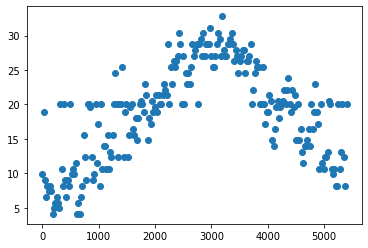

In [17]:
x = df1.loc[df1['year'] == 2017, 'temp']
plt.plot(x,'o')
plt.show()

In [18]:
data = np.array(x).reshape(-1,1)

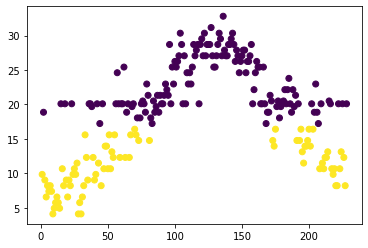

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0
 1 1 0 1 1 0]
[[23.24349919]
 [10.93      ]]
3145.871566484107


In [19]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data)
plt.scatter(np.linspace(1, len(data), len(data)), data, c=kmeans.labels_)
plt.show()
print(kmeans.labels_)
print(kmeans.cluster_centers_)
print(kmeans.inertia_)

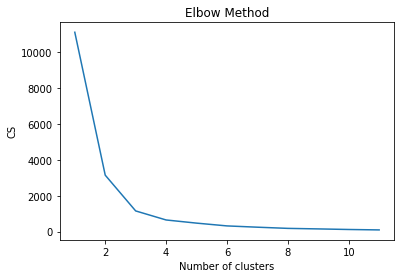

In [20]:
#ELbow method

cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, n_init = 10, random_state=0)
    kmeans.fit(data)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 12), cs)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

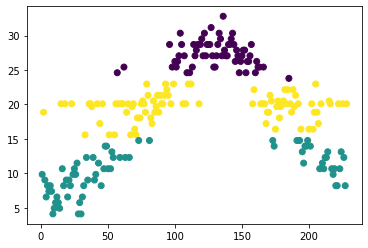

[1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 2
 2 1 1 1 2 1 2 1 2 1 1 1 1 2 1 1 1 2 2 0 2 1 2 2 0 1 2 2 1 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 0 0 0 0 0 2 0 2 0 2 0
 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 2 2 0 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 1 2 1 2 1 1 1 1 1 2 1 2 2 2 2 2 2 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2
 1 1 2 1 1 2]
[[27.33333333]
 [10.22722222]
 [19.69302024]]
1154.2739121175136


In [21]:
#3 Clusters

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data)
plt.scatter(np.linspace(1, len(data), len(data)), data, c=kmeans.labels_)
plt.show()
print(kmeans.labels_)
print(kmeans.cluster_centers_)
print(kmeans.inertia_)

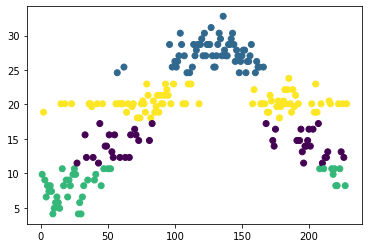

[2 3 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 3 2 2 2 2 3 2 2 2 0 2 2 2 2 2 0 0 2 3 3
 3 0 2 2 3 0 0 2 3 2 0 0 2 0 2 0 0 0 3 1 3 0 3 3 1 0 3 3 0 0 3 3 0 0 3 0 3
 3 3 3 3 3 3 0 3 0 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 3 1 1 1 1 1 1 3 1 3 1 3 1
 3 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 3 3 1 1 1 1 3 3 1 3 0 3 3 3 3 0 0 0 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 0 3 0 0 0 0 0 0 0 0 0 3 0 3 3 3 0 2 3 0 2 0 0 0 3 3 2 2 2 2 2 3
 2 0 3 0 2 3]
[[14.18790698]
 [27.39064516]
 [ 8.2572093 ]
 [20.33063602]]
650.3052056824264


In [22]:
#4 CLusters

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data)
plt.scatter(np.linspace(1, len(data), len(data)), data, c=kmeans.labels_)
plt.show()
print(kmeans.labels_)
print(kmeans.cluster_centers_)
print(kmeans.inertia_)

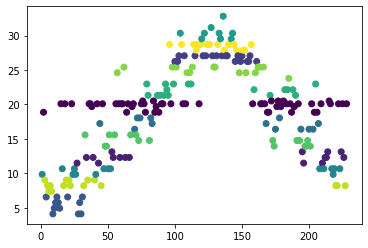

[ 5  0 10  3 10 10 10 10  3  3  3  3  3  3  0  5 10  0 10  3 10 10  0  5
  5  5  1  3  3  3  3 10  8  1 10  0  0  0  1 10  5  0  1  4 10  0  5  8
  8  5  8  5  1  1  8  0  9  0  1  0  0  9  1  0  0  1  8  0  0  4  8  4
  8  4  0  0  0  0  7  7  8  4  4  0  0  0  7  0  7  0  0  7  7  7  7 11
  0  9  7  2  9  2  2  6 11  0  2  0  9  7  9  7  9 11  2 11 11  0 11  6
  2  6  2 11 11 11  6  2  9  9  2 11  6  6  2  6 11  2  2 11 11  6  6 11
  2 11  2  9  2  2 11 11  9  2  2  2 11  0  7  9  2  9  9  0  0  9  0  4
  0  0  7  0  8  8  4  0  0  4  0  0  0  7  0  7  9  0  0  7  0  7  8  0
  8  4  1  1  8  8  8  4  8  0  4  0  7  0  4  5  0  1  5  1  1  1  0  0
  5  5  5 10 10  0  5  1  0  1 10  0]
[[19.87387512]
 [12.3       ]
 [26.773     ]
 [ 5.46666667]
 [17.15692308]
 [10.38666667]
 [30.43111111]
 [22.09444444]
 [14.71176471]
 [25.01      ]
 [ 8.35375   ]
 [28.47222222]]
77.88850598270899


In [23]:
#12 Clusters

kmeans = KMeans(n_clusters=12, random_state=0)
kmeans.fit(data)
plt.scatter(np.linspace(1, len(data), len(data)), data, c=kmeans.labels_)
plt.show()
print(kmeans.labels_)
print(kmeans.cluster_centers_)
print(kmeans.inertia_)

Although the elbow method showed that the optimal number of clusters is 3, the plot with 12 clusters has the smallest inertia.

In [25]:
#Agglomerative Clustering

data = np.array(x).reshape(-1,1)

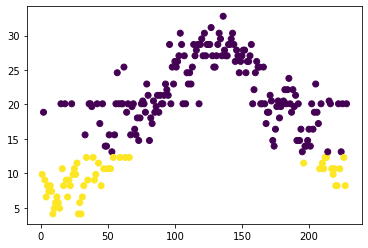

In [26]:
hierarch_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarch_cluster.fit_predict(data)
plt.scatter(np.linspace(1, len(data), len(data)), data, c=labels)
plt.show()

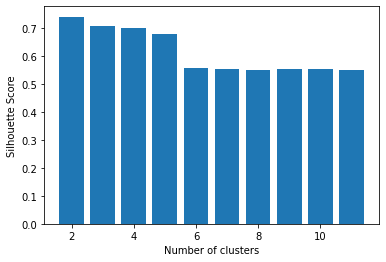

In [29]:
#Elbow method with silhouette score

y = np.linspace(1, len(data), len(data)).reshape(-1,1)
z = np.concatenate((data, y))
inertia = []
k = []
for i in range(2, 12):
    k.append(i)
    ac = AgglomerativeClustering(n_clusters = i)
    labels = ac.fit_predict(z)
    a = silhouette_score(z, labels)
    inertia.append(a)
plt.bar(k, inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

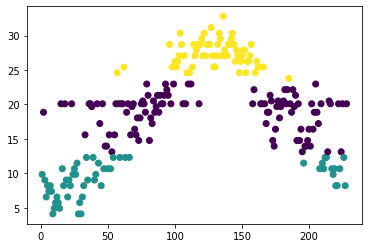

In [30]:
hierarch_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = hierarch_cluster.fit_predict(data)
plt.scatter(np.linspace(1, len(data), len(data)), data, c=labels)
plt.show()

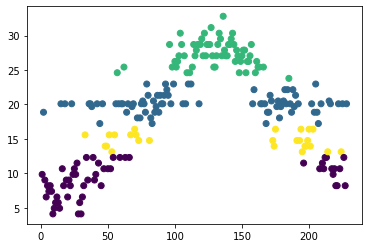

In [31]:
hierarch_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels = hierarch_cluster.fit_predict(data)
plt.scatter(np.linspace(1, len(data), len(data)), data, c=labels)
plt.show()

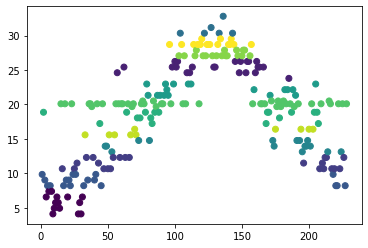

In [32]:
hierarch_cluster = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
labels = hierarch_cluster.fit_predict(data)
plt.scatter(np.linspace(1, len(data), len(data)), data, c=labels)
plt.show()